### 1.  Import the spam dataset and print the first six rows.  

In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
import pandas as pd

In [3]:
spam = pd.read_csv("D:/QMSS/Spring/Machine Learning/Midterm/spam_dataset.csv")

In [4]:
spam.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


### 2.  Read through the documentation of the original dataset here:

http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

#### The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

1. capital_run_length_avgerage
2. char_freq_$
3. word_freq_remove

I believe the variables listed above will be important predictors of spam because they sympolize emphisis and stress factors. What I mean by this is, if an email, on average, has a greater quantity of consecutive capital letters than it may be spam, as someone may use capital letters to evoke concern and stress, so to trick the person into responding. The frequency of the dollar sign suggestes that the email is in some manner related to money. People to tend to be concerned and considerate of the well being of their money, so a scammer may try to suggest that someone's money is at risk in order to evoke a response. Finally, the frequence of the word remove was chosen because it is a call to action that could be associted with  'virus removal' which is sometimes used by scammers to convince someone who may be new to email to respond what is ultimetly some brand of spam and not a resouce for virus removal. 


### 3.  Visualize the univariate distribution of each of the variables in the previous question.  

In [5]:
import seaborn as sns

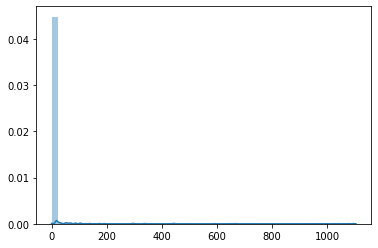

In [6]:
sns.distplot(pd.DataFrame(spam["capital_run_length_average:"]))

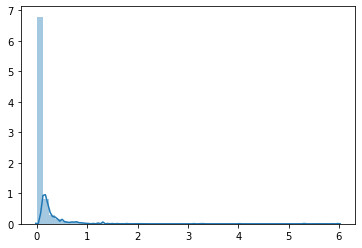

In [7]:
sns.distplot(pd.DataFrame(spam['char_freq_$:']))

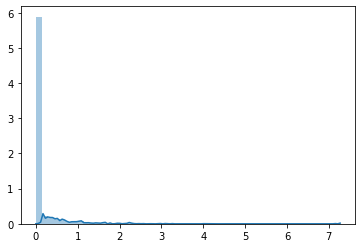

In [8]:
sns.distplot(pd.DataFrame(spam['word_freq_remove:']))

### 4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   

KNN Classification, Logistic Regression, Support Vector Machines, Naive Bayes, Decision Trees for Classification

### 5. Describe the importance of training and test data.  Why do we separate data into these subsets?

Because if you predict on training data you are likely to get a very accurate model that has not been tested on data it is yet to see, because of this we can't tell how well the model will perform on new data. If we don't know how well the model will perform on new data than we can't assume we have made a strong predictive model, as we may have just trained a model to only understand the data is was trained on (ie: overfitting)

### 6. What is k-fold cross validation and what do we use it for?

In [9]:
!pip install mglearn

In [10]:
import mglearn

D:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


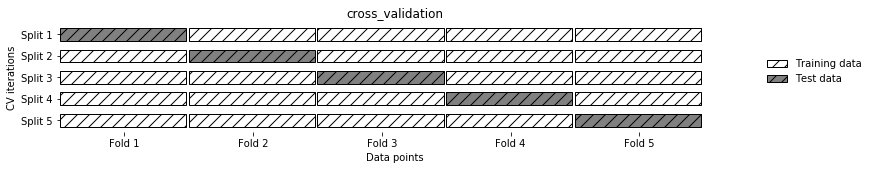

In [11]:
mglearn.plots.plot_cross_validation()

K-fold cross validation is a version of cross-validation, "where k is a user-specified number, usually 5 or 10.  When performing five-fold cross-validation, the data is first partitioned into five parts of (approximately) equal size, called folds.
Next, a sequence of models is trained. The first model is trained using the first fold as
the test set, and the remaining folds (2–5) are used as the training set. The model is
built using the data in folds 2–5, and then the accuracy is evaluated on fold 1. Then
another model is built, this time using fold 2 as the test set and the data in folds 1, 3,
4, and 5 as the training set. This process is repeated using folds 3, 4, and 5 as test sets.
For each of these five splits of the data into training and test sets, we compute the
accuracy."
- *Introduction to Machine Learning with Python (pg.252)*

We use K-fold as a way of evaluating performance assuiming we want a model that can be trained on a set of training data and predict successfully on testing data (data the model as not yet seen). Kfold allows for the entire data set to be broken up into different parts. This minimizes the risk of overfitting by training and testing the model of different train and test samples. While the training and testing samples do change with each cross validation one should note that the data being used to supply the creating of the training and testing splits all comes from the orginal data set. 

### 7. How is k-fold cross validation different from stratified k-fold cross validation?

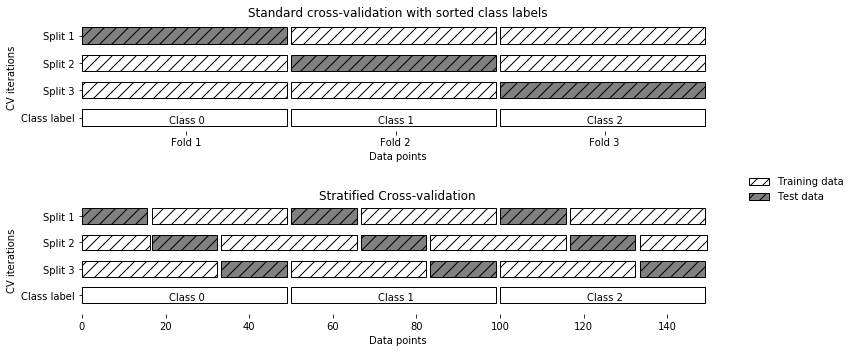

In [12]:
mglearn.plots.plot_stratified_cross_validation()


K-fold cross validation breaks up the data proportionally by the assigned k. So if you assiend k = 5 then the data is broken up into five folds, each roughly the same size. In k-fold cross validation the folds will start with the first 1/kth of the data. So for the example I disccus the first fold will contain the first 1/5th of the data. 

However this is not always the best approach, upon considering the data.

If the data in our set was collected in a manner where the first fifth of the data has a label, say (1), and the second fifth of the data has a label (2), and so on. If we were to perform kfold cross validation at k = 5 than the first fold would contain data only with label (1) and the second fold would contain only data with the label (2). If we were to train using approach than a model would be trained on data labeled (2-5) to predict on data labeled (1). In order to assure that we can predict well with our model, we want to train it on data that contains all labels. In this situation k-fold would prevent us from doing so.

Stratified K-fold for classes in data to be represented proportionally, so if 20% of one's data is in a class labeled (1), then stratified cross validation ensures that 20% of each fold is made up of class (1) data. 

Stratified K-fold is typically used to cross validate classification models because it produces more reliable estimates of performance. 

- *Introduction to Machine Learning with Python (pg.256)*

### 8. Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  

#### Please Note: Because this question, and the proceeding 3 questions, requires the use of classifiers, the performance metric will be labeld "accuracy", as to show the models ability to predict on new data. The confusion matricies will be provided within each question to show where the model was able to successfully predict and where it was unable to do so. 

### KNN

Do note that the data was scaled in this case to allow KNN to predict better, using the standard scalar on data for KNN is a common practice. 

In [13]:
y = spam['spam']
X = spam[['capital_run_length_average:','char_freq_$:','word_freq_remove:']]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test)

print("accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy: 0.87
[[  0 699]
 [  0 452]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       699
           1       0.39      1.00      0.56       452

    accuracy                           0.39      1151
   macro avg       0.20      0.50      0.28      1151
weighted avg       0.15      0.39      0.22      1151



#### K-Fold Cross Validation

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [18]:
kfold=KFold(n_splits=5)

In [19]:
print("Cross-validation scores:\n{}".format(
 cross_val_score(knn, X, y, cv=kfold)))

print("Cross-validation scores:\n{}".format(
 cross_val_score(knn, X, y, cv=kfold).mean()))

Cross-validation scores:
[0.63517915 0.67282609 0.81413043 0.90217391 0.84565217]
Cross-validation scores:
0.7739923523580229


#### GridSearchCv to determine appropriate K-value

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [21]:
knn_pipe = make_pipeline(KNeighborsClassifier())

In [22]:
param_grid = {'kneighborsclassifier__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'kneighborsclassifier__n_neighbors': 9}
0.8542028985507246


In [23]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test)

print("accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy: 0.87
[[  0 699]
 [  0 452]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       699
           1       0.39      1.00      0.56       452

    accuracy                           0.39      1151
   macro avg       0.20      0.50      0.28      1151
weighted avg       0.15      0.39      0.22      1151



We see that GridSearch suggests a K of 9. We realize an accuracy of 0.87 which means our classifier is correctly predicting on unseen data 87% of the time. Unfortunetly this change of K from 5 to 9 does not drastically improve the accuracy of the model, we can see this from the accuracy remaining unchanged despite the change of K.

### 9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logreg = LogisticRegression(C=1e90).fit(X_train, y_train)
print("accuracy: {:.2f}".format(logreg.score(X_test,y_test)))
pred = logreg.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy: 0.85
[[671  28]
 [147 305]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       699
           1       0.92      0.67      0.78       452

    accuracy                           0.85      1151
   macro avg       0.87      0.82      0.83      1151
weighted avg       0.86      0.85      0.84      1151



In [26]:
import statsmodels.api as sm

X_train_new = sm.add_constant(X_train)  

model = sm.GLM(y_train, X_train_new, family=sm.families.Binomial()).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   spam   No. Observations:                 3450
Model:                            GLM   Df Residuals:                     3446
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 15 Mar 2020   Deviance:                          nan
Time:                        13:09:40   Pearson chi2:                 4.50e+15
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.8110      0.073    -24.732      0.000      -1.955      -1.667
capital_run_length_average:     0.1624      0.019      8.399      0.000       0.125       0.200
char_freq_$:                   11.7216      0.716     16.376      0.000      10.319      13.124
word_freq_remove:               4.7057      0.393     11.985      0.000       3.936       5.475
===============================================================================================
"""

#### K-Fold Cross Validation

In [27]:
kfold=KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(
 cross_val_score(logreg, X, y, cv=kfold)))

print("Cross-validation scores Mean:\n{}".format(
 cross_val_score(logreg, X, y, cv=kfold).mean()))

Cross-validation scores:
[0.52660152 0.57391304 0.92826087 0.95543478 0.94565217]
Cross-validation scores Mean:
0.7859724779304159


### GridSearch to determine appropriate C value

In [28]:
logi_pipe = make_pipeline(LogisticRegression())

In [29]:
param_grid = {'logisticregression__C': [1000,10000,100000,1e80,1e90]}
grid = GridSearchCV(logi_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'logisticregression__C': 1000}
0.8376811594202899


In [30]:
logreg = LogisticRegression(C=1000).fit(X_train, y_train)
print("accuracy: {:.2f}".format(logreg.score(X_test,y_test)))
pred = logreg.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy: 0.85
[[671  28]
 [147 305]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       699
           1       0.92      0.67      0.78       452

    accuracy                           0.85      1151
   macro avg       0.87      0.82      0.83      1151
weighted avg       0.86      0.85      0.84      1151



We can see that after consulting GridSearch Cv we are told to use a C=1000, however our output does not allow for the relaization that the model's predicitve power has improved, as the accuracy has stayed the same, despite the change.

### 10. Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

### Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB 

In [32]:
nb = GaussianNB()
nb.fit(X_train,y_train)
pred = nb.predict(X_test)

In [33]:
print("accuracy: {:.2f}".format(nb.score(X_test, y_test)))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy: 0.76
[[687  12]
 [265 187]]
              precision    recall  f1-score   support

           0       0.72      0.98      0.83       699
           1       0.94      0.41      0.57       452

    accuracy                           0.76      1151
   macro avg       0.83      0.70      0.70      1151
weighted avg       0.81      0.76      0.73      1151



#### K-Fold Cross Validation

In [34]:
kfold=KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(
 cross_val_score(nb, X, y, cv=kfold)))

print("Cross-validation scores Mean:\n{}".format(
 cross_val_score(nb, X, y, cv=kfold).mean()))

Cross-validation scores:
[0.40716612 0.40543478 0.9673913  0.97826087 0.98478261]
Cross-validation scores Mean:
0.7486071377991785


### 11. Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

### Support Vector Machines (Classification)

In [35]:
from sklearn.svm import LinearSVC

In [36]:
svmc = LinearSVC()

In [37]:
svmc.fit(X_train,y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [38]:
pred = svmc.predict(X_test)

In [39]:
print("accuracy: {:.2f}".format(svmc.score(X_test, y_test)))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy: 0.83
[[676  23]
 [167 285]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       699
           1       0.93      0.63      0.75       452

    accuracy                           0.83      1151
   macro avg       0.86      0.80      0.81      1151
weighted avg       0.85      0.83      0.83      1151



#### K-Fold Cross Validation

In [40]:
kfold=KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(
 cross_val_score(svmc, X, y, cv=kfold)))

print("Cross-validation scores Mean:\n{}".format(
 cross_val_score(svmc, X, y, cv=kfold).mean()))

Cross-validation scores:
[0.47882736 0.53586957 0.93804348 0.96086957 0.94347826]
Cross-validation scores Mean:
0.7707659443893689


### 12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models?  

### KNN

New variables to be included: char_freq_!, word_freq_address, capital_run_length_longest

In [41]:
X = spam[['capital_run_length_average:','char_freq_$:','word_freq_remove:','char_freq_!:',
          'word_freq_address:','capital_run_length_longest:']]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [43]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test)

print("accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy: 0.88
[[ 69 632]
 [  0 450]]
              precision    recall  f1-score   support

           0       1.00      0.10      0.18       701
           1       0.42      1.00      0.59       450

    accuracy                           0.45      1151
   macro avg       0.71      0.55      0.38      1151
weighted avg       0.77      0.45      0.34      1151



The model has become slightly more accurate since the introduction of additional variables. However because the change is quite minimal, this appears to suggest that the variables selected do not significanty improve the predicitve power of the overal model. We would look to consider adding additional variabels or replacing the chosen one's going forward. 


### 13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?  

### Logistic Regression

In [45]:
logreg = LogisticRegression(C=1e90).fit(X_train, y_train)
print("accuracy: {:.2f}".format(logreg.score(X_test,y_test)))

accuracy: 0.85


### Naive Bayes

In [46]:
nb = GaussianNB()
nb.fit(X_train,y_train)
pred = nb.predict(X_test)
print("accuracy: {:.2f}".format(nb.score(X_test, y_test)))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy: 0.79
[[675  26]
 [214 236]]
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       701
           1       0.90      0.52      0.66       450

    accuracy                           0.79      1151
   macro avg       0.83      0.74      0.76      1151
weighted avg       0.81      0.79      0.78      1151



### Support Vector Machine

In [47]:
svmc.fit(X_train,y_train)
pred = svmc.predict(X_test)
print("accuracy: {:.2f}".format(svmc.score(X_test, y_test)))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy: 0.84
[[662  39]
 [148 302]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       701
           1       0.89      0.67      0.76       450

    accuracy                           0.84      1151
   macro avg       0.85      0.81      0.82      1151
weighted avg       0.84      0.84      0.83      1151



The KNN model proved to be the best model given the data as, once the data was scaled (accuracy: 0.88), the ability to predict was notably greater than then the Logistic Regression, Naive Bayes, and Support Vector Machine. We can see this from both the accuracy score and confusion matricies

### 14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

To improve the predictive power I would like to include presense of the word 'shipping'. Shipping is a word that comonly appears in spam emails, as it may provoke a user to be inspired to shop if the spam email promisses well priced or free shipping. This variable would be coded in the same manner that the other words are coded; as a continous variable that represents the frequency that the word appears in a given email. 

### 15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable. 

OLS Linear Regression, Ridge, and Lasso, KNN Regression, Decision Trees for Regression